In [129]:
import dbnomics
import numpy as np

In [131]:
gdp = dbnomics.fetch_series( "OECD", "MEI", "USA.NAEXCP01.STSA.A" )

In [132]:
inflation = dbnomics.fetch_series("OECD", "KEI", "CPALTT01.USA.GP.A")

In [133]:
# growth = dbnomics.fetch_series("OECD", "CSPCUBE", "EVOGDP_T1.USA")

In [134]:
unemployment = dbnomics.fetch_series("OECD", "CSPCUBE", "UNEMPLRT_T1C.USA")

In [135]:
import matplotlib.pyplot as plt

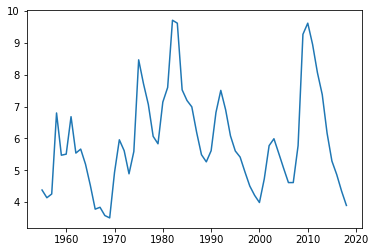

In [136]:
plt.plot(unemployment['period'], unemployment['value'])

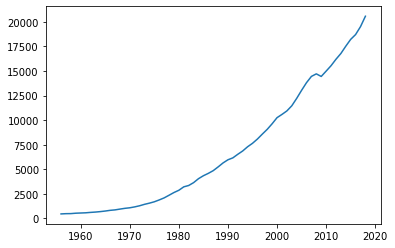

In [137]:
plt.plot(growth['period'], growth['value'])

In [140]:
# unemployment, growth, inflation, gdp = [e[['period','value']]for e in [unemployment, growth, inflation, gdp]]
unemployment, inflation, gdp = [e[['period','value']].set_index('period') for e in [unemployment, inflation, gdp]]

In [169]:
growth = gdp.diff()/gdp.shift(1)

In [170]:
growth

,value
period,
1955-01-01,NaN
1956-01-01,0.056108
1957-01-01,0.054939
1958-01-01,0.015165
1959-01-01,0.084005
...,...
2014-01-01,0.044231
2015-01-01,0.039796
2016-01-01,0.026901


In [171]:
df = unemployment.merge(growth, on='period').merge(inflation, on='period').merge(gdp, on='period', suffixes=('_z', '_t')).rename(columns=
    {'value_x': "unemployment", 'value_y': "growth", 'value_z': 'inflation', 'value_t': 'gdp'})

In [181]:
df['period'] = df.index

In [183]:
import altair as alt

In [184]:
ch = alt.Chart(df)

In [185]:
ch.mark_point().encode(x='inflation', y='unemployment')

alt.Chart(...)

In [199]:
brush = alt.selection_interval(encodings=['x'])
timeline = ch.mark_point().encode(x='period', y='gdp').add_selection(brush)
reg_philips = ch.transform_filter(brush).encode(x='unemployment', y='inflation').transform_regression('unemployment', 'inflation').mark_line()
philips = ch.mark_point().encode(x='unemployment', y='inflation', color=alt.condition(brush, alt.value("lightblue"), alt.value('lightgray')))

reg_okun = ch.transform_filter(brush).encode(x='growth', y='unemployment').transform_regression('growth', 'unemployment').mark_line()
okun = ch.mark_point().encode(x='growth', y='unemployment', color=alt.condition(brush, alt.value("default"), alt.value('lightgray')))

reg_gg = ch.transform_filter(brush).encode(x='growth', y='inflation').transform_regression('growth', 'inflation').mark_line()
gg = ch.mark_point().encode(x='growth', y='inflation', color=alt.condition(brush, alt.value("default"), alt.value('lightgray')))

timeline & (philips+reg_philips) | (okun + reg_okun) & (reg_gg+gg)

alt.HConcatChart(...)